# Week

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("tennis.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
ranking        1000 non-null int64
country        1000 non-null object
player         1000 non-null object
age            1000 non-null int64
points         1000 non-null int64
tournplayed    1000 non-null int64
born           1000 non-null int64
weight         462 non-null float64
height         704 non-null float64
hand           723 non-null object
gender         1000 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 86.0+ KB


In [5]:
df.head()

ranking country            player  age  points  tournplayed  born  weight  \
0        1     ESP      Rafael Nadal   31    8770           14  1986    85.0   
1        2     SUI     Roger Federer   36    8670           17  1981    85.0   
2        3     CRO       Marin Cilic   29    4985           20  1988    89.0   
3        4     GER  Alexander Zverev   20    4925           24  1997    86.0   
4        5     BUL   Grigor Dimitrov   26    4635           22  1991    80.0   

   height hand gender  
0   185.0    L      M  
1   185.0    R      M  
2   198.0    R      M  
3   198.0    R      M  
4   191.0    R      M

In [6]:
df.corr().style.background_gradient(cmap='viridis')

In [7]:
print("Average rank of RH:", df.loc[df["hand"] == "R"]["ranking"].mean())
print("Average rank of LH:", df.loc[df["hand"] == "L"]["ranking"].mean())

Average rank of RH: 219.67185069984447
Average rank of LH: 192.2405063291139


In [8]:
print("Average rank of RH:", df.loc[df["hand"] == "R"]["points"].mean())
print("Average rank of LH:", df.loc[df["hand"] == "L"]["points"].mean())

Average rank of RH: 595.3157076205288
Average rank of LH: 642.2278481012659


In [9]:
dfM = df.loc[df["gender"] == "M"]


In [10]:
dfM

ranking country                        player  age  points  tournplayed  \
0          1     ESP                  Rafael Nadal   31    8770           14   
1          2     SUI                 Roger Federer   36    8670           17   
2          3     CRO                   Marin Cilic   29    4985           20   
3          4     GER              Alexander Zverev   20    4925           24   
4          5     BUL               Grigor Dimitrov   26    4635           22   
5          6     ARG         Juan Martin del Potro   29    4470           20   
6          7     AUT                 Dominic Thiem   24    3665           25   
7          8     RSA                Kevin Anderson   31    3390           22   
8          9     USA                    John Isner   32    3125           25   
9         10     BEL                  David Goffin   27    3110           24   
10        11     FRA                 Lucas Pouille   24    2410           24   
11        12     ESP           Pablo Carreno Busta   26    2395           25   
12        13     SRB                Novak Djokovic   30    2310           15   
13        14     USA                   Sam Querrey   30    2220           23   
14        15     ARG             Diego Schwartzman   25    2220           26   
15        16     ESP         Roberto Bautista Agut   30    2175           25   
16        17     USA                     Jack Sock   25    2155           22   
17        18     CZE                 Tomas Berdych   32    2140           19   
18        19     KOR                   Hyeon Chung   21    1897           22   
19        20     ITA                 Fabio Fognini   30    1840           24   
20        21     SUI                 Stan Wawrinka   33    1785           14   
21        22     CAN                  Milos Raonic   27    1765           20   
22        23     GBR                   Kyle Edmund   23    1757           25   
23        24     ESP          Albert Ramos-Vinolas   30    1745           29   
24        25     AUS                  Nick Kyrgios   22    1720           19   
25        26     FRA              Adrian Mannarino   29    1655           26   
26        27     SRB              Filip Krajinovic   26    1616           25   
27        28     LUX                 Gilles Muller   34    1465           22   
28        29     GBR                   Andy Murray   30    1450           14   
29        30     ESP               Feliciano Lopez   36    1420           24   
..       ...     ...                           ...  ...     ...          ...   
470      471     HUN                 Zsombor Piros   18      76           17   
471      472     AUT                 David Pichler   22      76           25   
472      473     ITA                Pietro Rondoni   24      76           26   
473      474     IRL                   James McGee   30      75            8   
474      475     GBR               Tom Farquharson   26      75           13   
475      476     FRA                Laurent Lokoli   23      75           17   
476      477     USA                    Ryan Shane   24      74           16   
477      478     GBR               Lloyd Glasspool   24      74           17   
478      479     ISR                Igor Smilansky   23      74           23   
479      480     ZIM                 Benjamin Lock   25      74           31   
480      481     FRA                   Gianni Mina   26      73           18   
481      482     BEL                 Clement Geens   22      73           23   
482      483     AUT                Pascal Brunner   28      72           18   
483      484     GER                   Julian Lenz   25      71           17   
484      485     NED       Botic Van de Zandschulp   22      71           17   
485      486     GER                 Peter Torebko   30      70           20   
486      487     IRL                     Sam Barry   26      70           20   
487      488     USA                 Ulises Blanch   20      70           22   
488  

In [11]:
df.head()

ranking country            player  age  points  tournplayed  born  weight  \
0        1     ESP      Rafael Nadal   31    8770           14  1986    85.0   
1        2     SUI     Roger Federer   36    8670           17  1981    85.0   
2        3     CRO       Marin Cilic   29    4985           20  1988    89.0   
3        4     GER  Alexander Zverev   20    4925           24  1997    86.0   
4        5     BUL   Grigor Dimitrov   26    4635           22  1991    80.0   

   height hand gender  
0   185.0    L      M  
1   185.0    R      M  
2   198.0    R      M  
3   198.0    R      M  
4   191.0    R      M

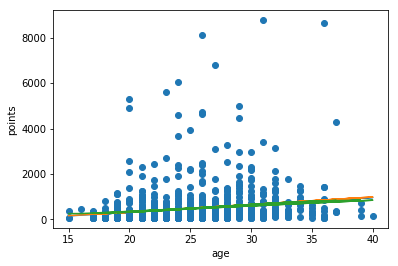

In [12]:
x = df["age"]
y = df["points"]
plt.scatter(x, y)
plt.xlabel("age")
plt.ylabel("points")
p1 = poly1d(polyfit(x, y, 1))
p2 = poly1d(polyfit(x, y, 2))
p3 = poly1d(polyfit(x, y, 3))
xu = x.unique()
plot(xu, p1(xu), xu, p2(xu), xu, p3(xu))

In [13]:
poly1d(polyfit(df["age"], df["points"], 2))(0)

-255.78883132530993

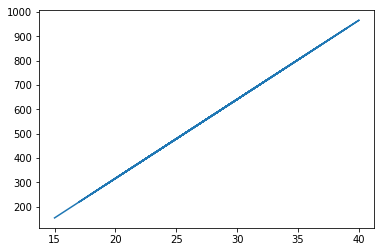

In [14]:
plot(xu, p1(xu))

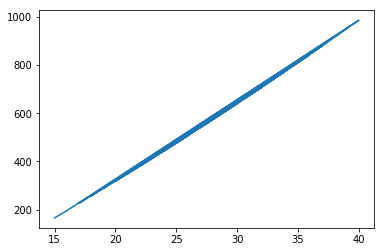

In [15]:
plot(xu, p2(xu))

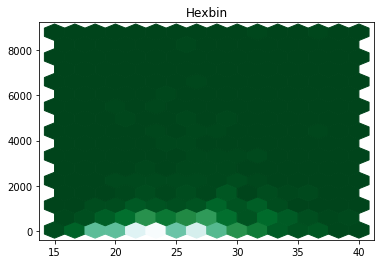

In [16]:
nbins = 15
title('Hexbin')
hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

In [17]:
import matplotlib

Text(0,0.5,'points')

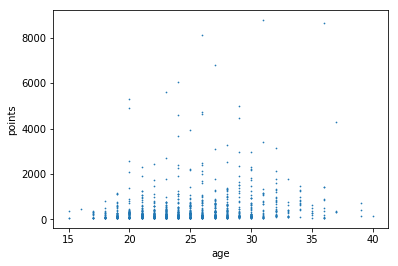

In [18]:
plot(x, y, linestyle='', marker='o', markersize=0.7)
xlabel("age")
ylabel("points")

# Handedness t-test

In [19]:
scoresL = df.loc[df["hand"] == "L"]["points"]
scoresR = df.loc[df["hand"] == "R"]["points"]

In [20]:
print("left-handed mean:", scoresL.mean())
print("left-handed var:", scoresL.var())
print("right-handed mean:", scoresR.mean())
print("right-handed var:", scoresR.var())

left-handed mean: 642.2278481012659
left-handed var: 1196169.9474196683
right-handed mean: 595.3157076205288
right-handed var: 885851.1384912046


In [21]:
ttest = (scoresL.mean() - scoresR.mean()) / (np.sqrt(scoresL.var()/(len(scoresL)-1) + scoresR.var()/(len(scoresR)-1)))

In [22]:
ttest

0.3628504016994108

In [23]:
degfree = (len(scoresL) + len(scoresR)) - 2
degfree

720

Links to the converters:
- https://surfstat.anu.edu.au/surfstat-home/tables/t.php
- http://www.socscistatistics.com/pvalues/tdistribution.aspx
- https://goodcalculators.com/student-t-value-calculator/

TODO:
- try the stats package imported above to do the t-tests and calculate the alpha and p values